In [1]:
#Importing Libraries
import saha_mult #Class used to calculate abundances 
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as sc
from time import process_time #Useful for finding calculation times
import pickle #for saving data in lists to txt files.


import importlib 
importlib.reload(saha_mult) #This command ensures that any changes made to saha_mult class are reflected in this notebook

<module 'saha_mult' from 'C:\\Users\\bluef\\Documents\\Research\\R-process_Mergers\\Abundance_Calculations\\Fixing_Cutoff\\saha_mult.py'>

In [2]:
'''with open("All_Elements.txt", "rb") as fp:   # Unpickling
      YI = pickle.load(fp)

with open("Lanthanides.txt", "rb") as fp:   # Unpickling
      YI_lanth = pickle.load(fp)
        
with open("Lanthanides_Actinides.txt", "rb") as fp:   # Unpickling
      YI_lanth_act = pickle.load(fp)
        
with open("All_class_adjusted.txt", "rb") as fp:   # Unpickling
      YI_all_adjusted = pickle.load(fp)'''

'with open("All_Elements.txt", "rb") as fp:   # Unpickling\n      YI = pickle.load(fp)\n\nwith open("Lanthanides.txt", "rb") as fp:   # Unpickling\n      YI_lanth = pickle.load(fp)\n        \nwith open("Lanthanides_Actinides.txt", "rb") as fp:   # Unpickling\n      YI_lanth_act = pickle.load(fp)\n        \nwith open("All_class_adjusted.txt", "rb") as fp:   # Unpickling\n      YI_all_adjusted = pickle.load(fp)'

In [3]:
ion_potential_Sm = np.array([5.643710e+00, 1.107800e+01, 2.355000e+01, 4.164000e+01,
        6.270000e+01, 8.700000e+01, 1.030000e+02, 1.180000e+02,
        1.410000e+02, 1.580000e+02, 1.790000e+02, 2.080000e+02,
        2.370000e+02, 2.570000e+02, 2.760000e+02, 3.065000e+02,
        4.740000e+02, 5.060000e+02, 5.430000e+02, 5.810000e+02,
        6.170000e+02, 6.580000e+02, 7.020000e+02, 7.420000e+02,
        7.820000e+02, 8.220000e+02, 9.760000e+02, 1.016000e+03,
        1.060000e+03, 1.103000e+03, 1.180000e+03, 1.226000e+03,
        1.332000e+03, 1.381560e+03, 2.371000e+03, 2.466000e+03,
        2.569000e+03, 2.676000e+03, 2.782000e+03, 2.887000e+03,
        3.028000e+03, 3.137000e+03, 3.253000e+03, 3.363000e+03,
        3.669000e+03, 3.766000e+03, 3.873000e+03, 3.971000e+03,
        4.227000e+03, 4.337000e+03, 4.548000e+03, 4.655000e+03,
        1.049400e+04, 1.076200e+04, 1.106000e+04, 1.133700e+04,
        1.226400e+04, 1.258800e+04, 1.299200e+04, 1.326285e+04,
        5.398612e+04, 5.521423e+04])

In [4]:
hf = h5py.File("SkyNet_r-process.h5")

#This cell is simply for temperature, and since it does not change no matter the elements used, I do not use a function
#At some point, I will have to find a way to find the places to calculate the indices to use to find slope for other hdf5s
temperature = hf["Temperature"]
time = hf["Time"]
mod_temp = []
full_temp = []

linear = np.polyfit(np.log10(np.array(time[900:1700])),np.log10(np.array(temperature[900:1700])),1)
m = linear[0]

for i in range(0,len(temperature)):
    if i < 1700:
        mod_temp.append(np.log10(temperature[i]))
        full_temp.append(temperature[i])
    else:
        del_t = m*(np.log10(time[i]) - np.log10(time[i-1]))
        mod_temp.append(mod_temp[i-1]+del_t)
        full_temp.append(10**mod_temp[i])
        
abundance = hf["Y"]
charge = hf["Z"]
density = hf["Density"]
kbEvpGK = 8.617e-5*1e9

C:\Users\bluef\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


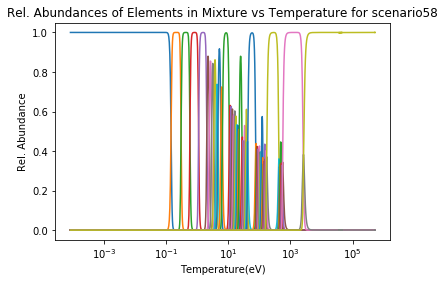

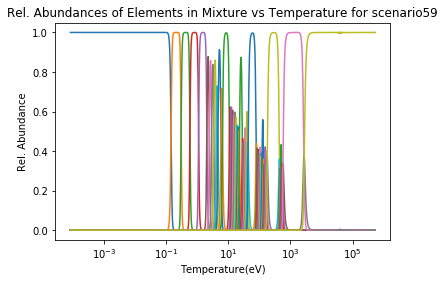

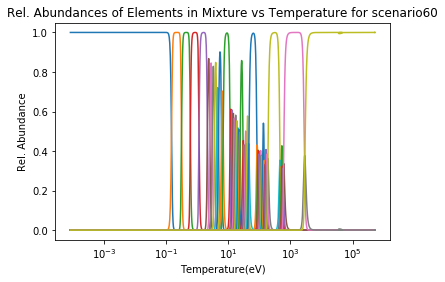

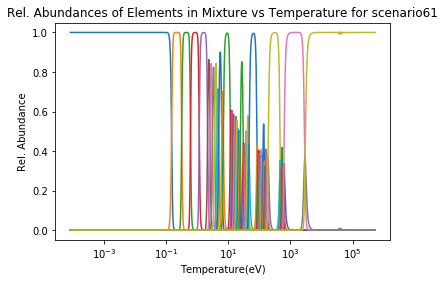

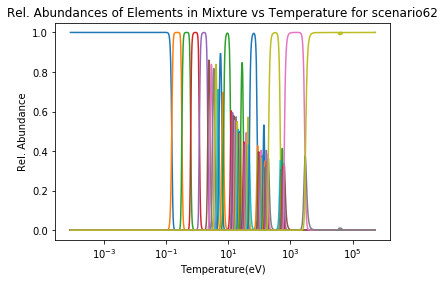

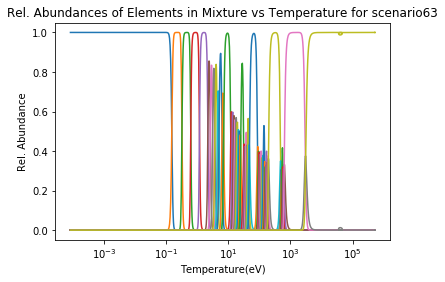

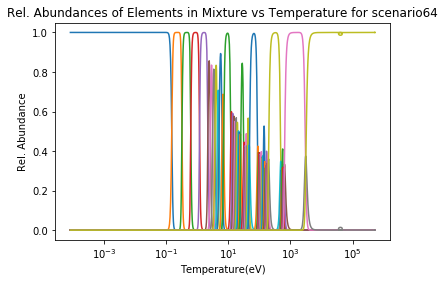

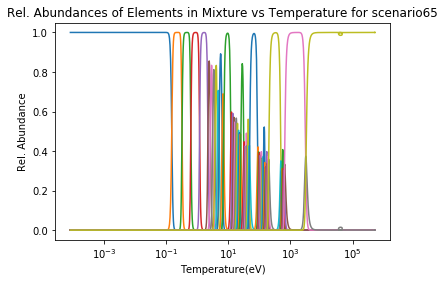

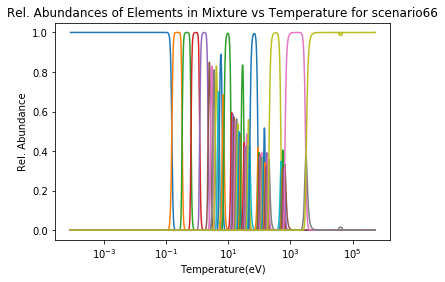

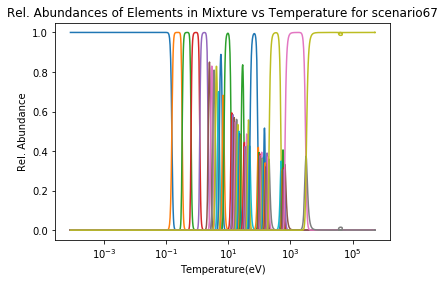

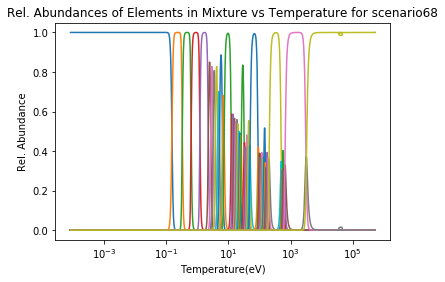

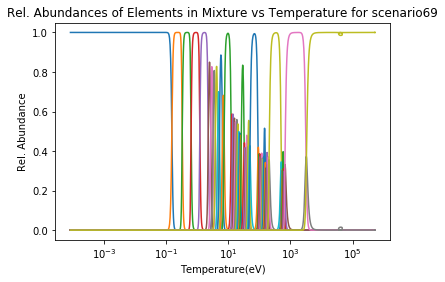

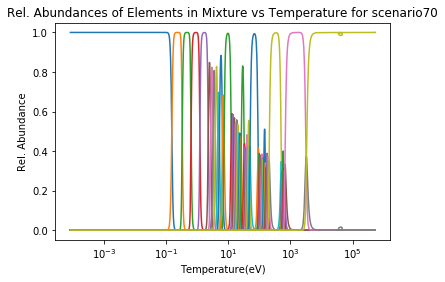

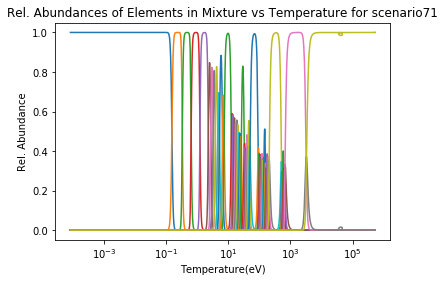

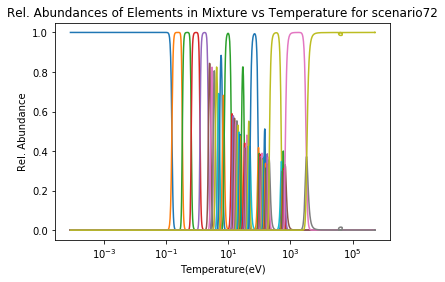

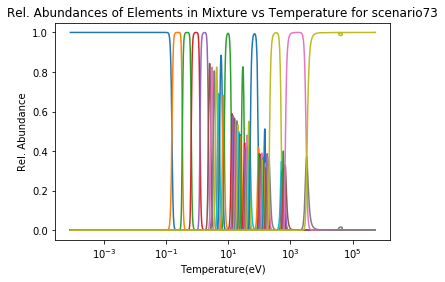

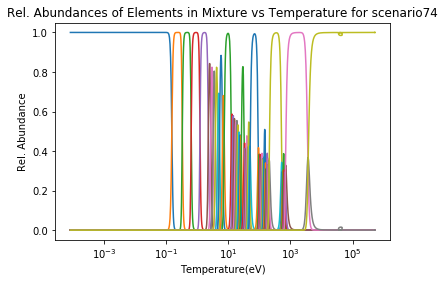

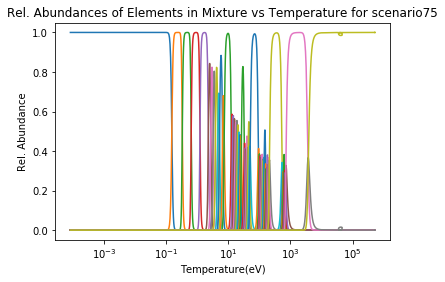

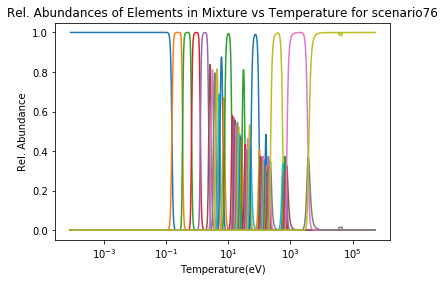

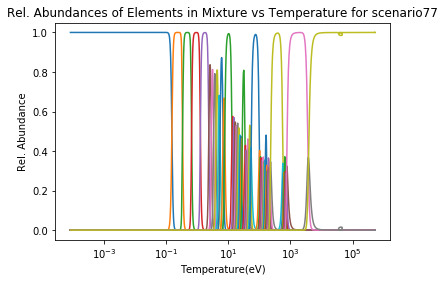

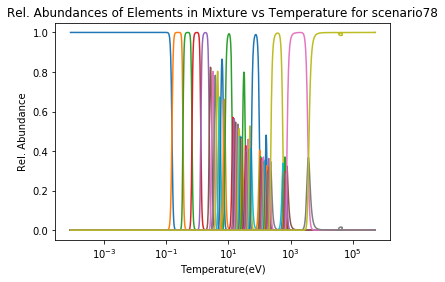

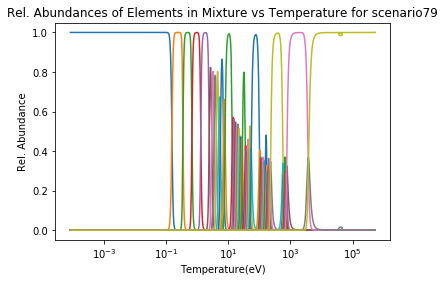

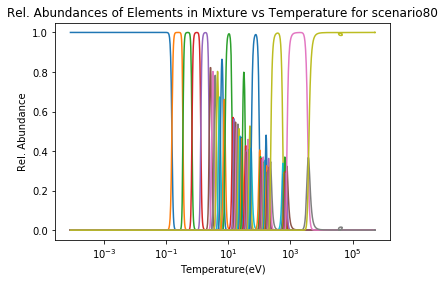

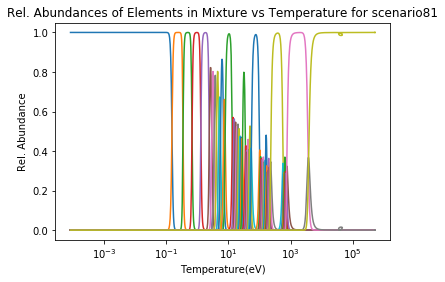

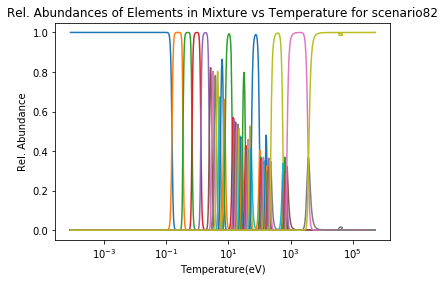

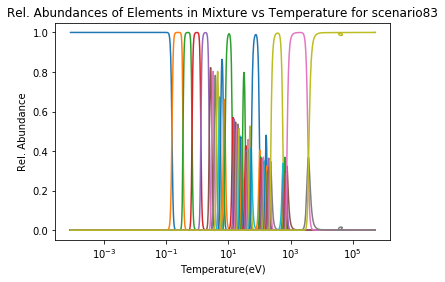

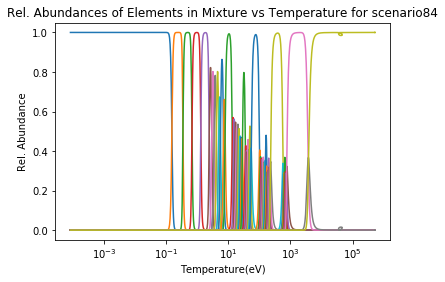

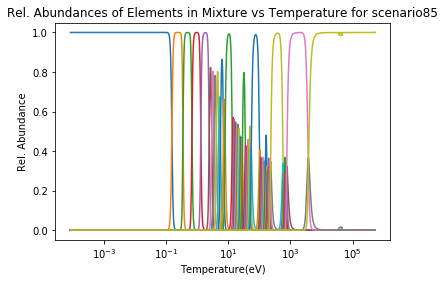

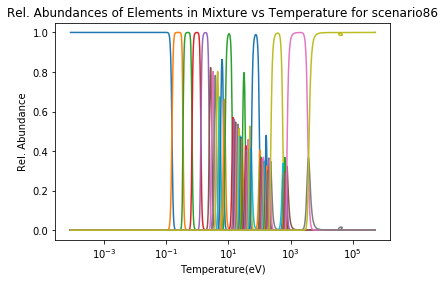

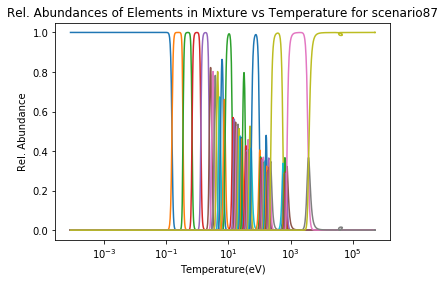

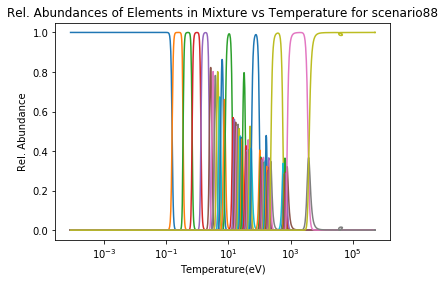

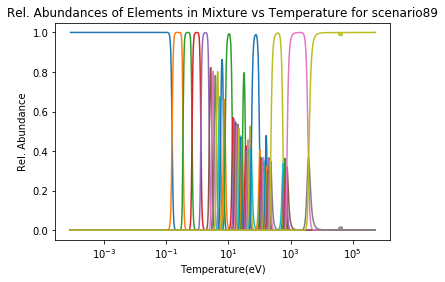

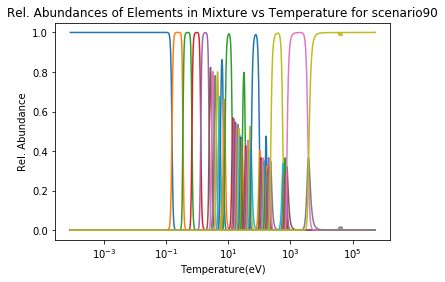

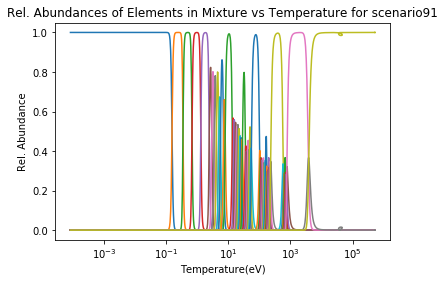

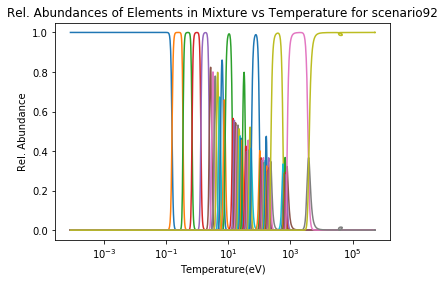

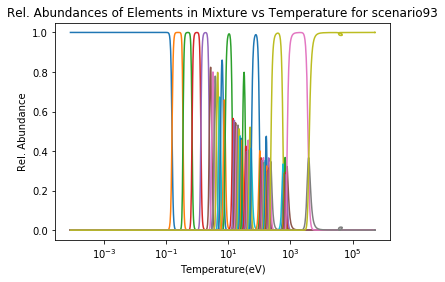

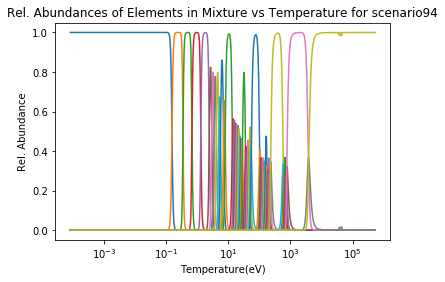

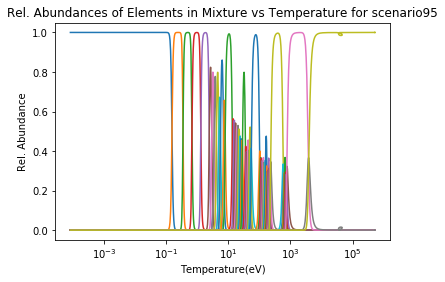

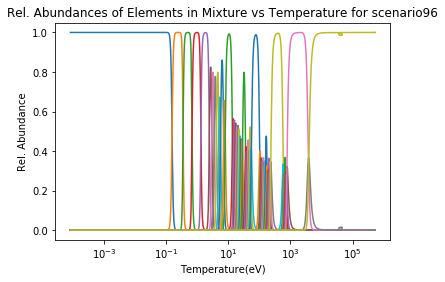

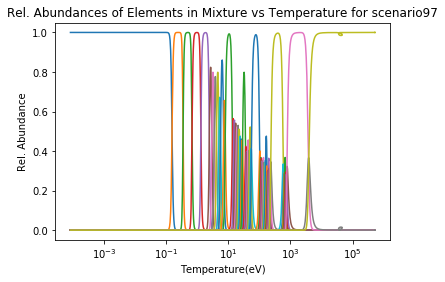

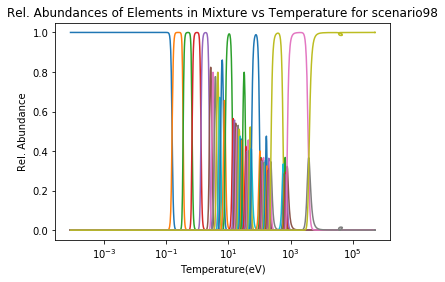

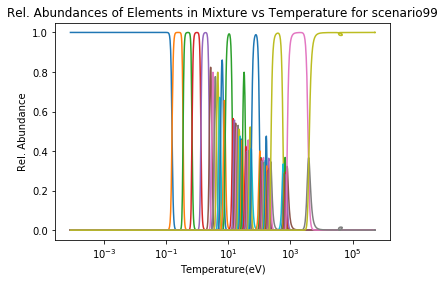

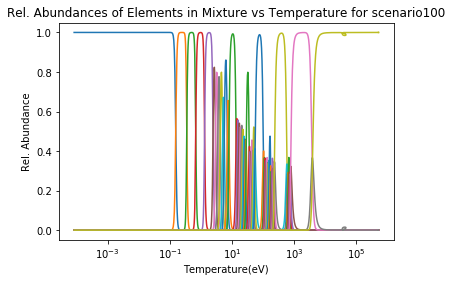

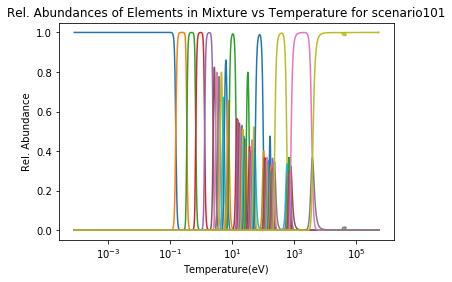

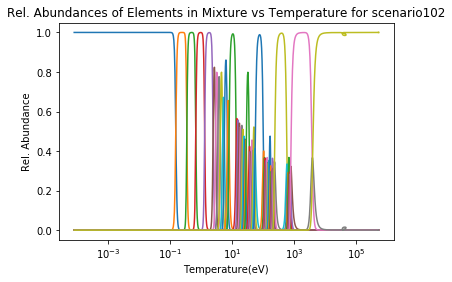

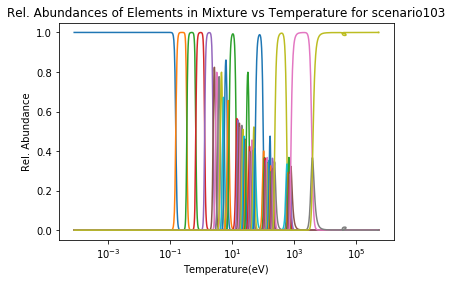

In [15]:
#This data, unfortunately, is only for the lanthanides and actinides. What you really need to do is run the same process, but
#for elements 1 to 103
for i in range(58,104):
    file = 'calculation'+str(i)+'.txt'
    with open(file, "rb") as fp:   
        YI = pickle.load(fp)
        
    Y = YI[0]
    Ytot = np.sum(Y,1)
    for j in range(len(Y[0])):
        plt.semilogx(kbEvpGK*np.array(full_temp),(Y[:,j])/Ytot)
        plt.xlabel("Temperature(eV)")
        plt.ylabel("Rel. Abundance")
        title = "Rel. Abundances of Elements in Mixture vs Temperature for scenario"+str(i)
        plt.title(title)
    plt.show()


In [12]:
np.shape(YI[0][0])

(59,)

This is the graph for element  1 so there are  2  ionization states graphed


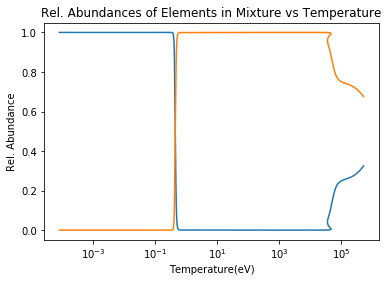

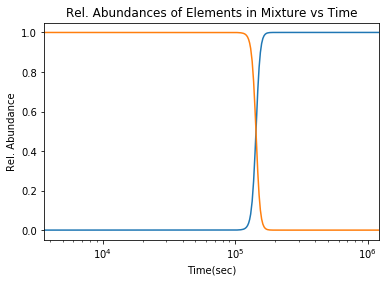

This is the graph for element  2 so there are  3  ionization states graphed


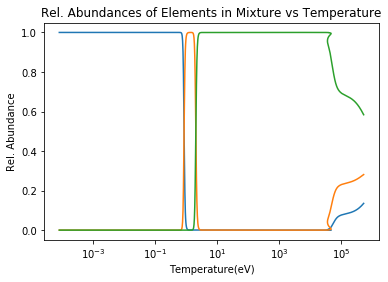

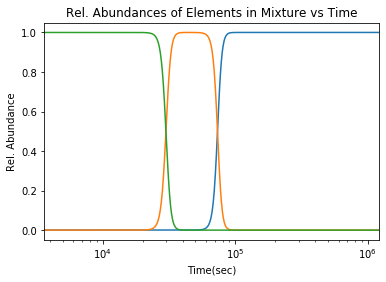

This is the graph for element  3 so there are  4  ionization states graphed


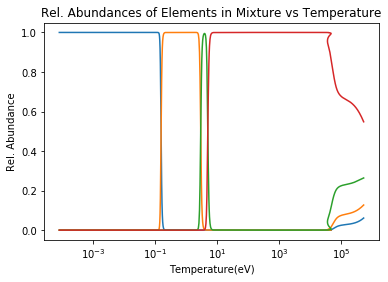

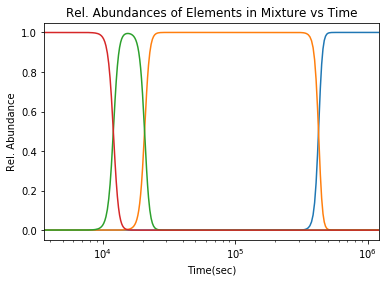

This is the graph for element  4 so there are  5  ionization states graphed


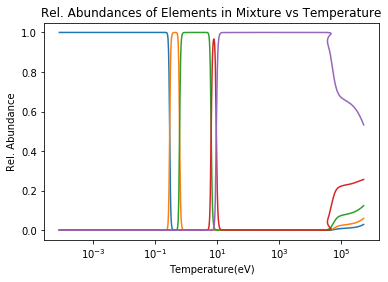

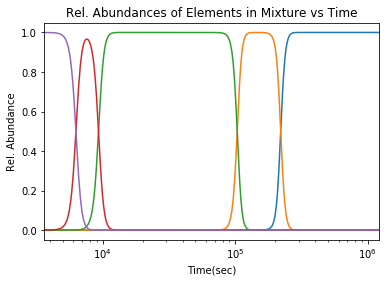

This is the graph for element  5 so there are  6  ionization states graphed


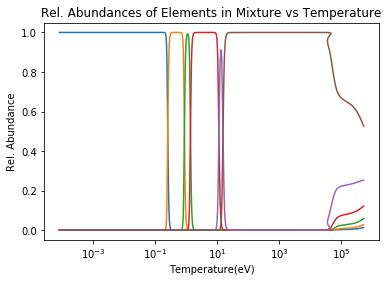

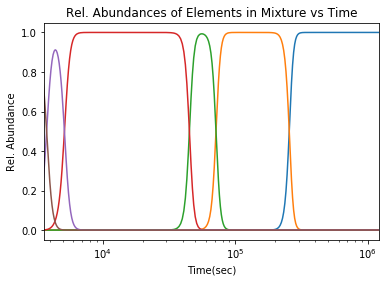

This is the graph for element  6 so there are  7  ionization states graphed


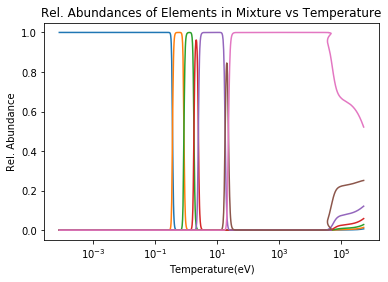

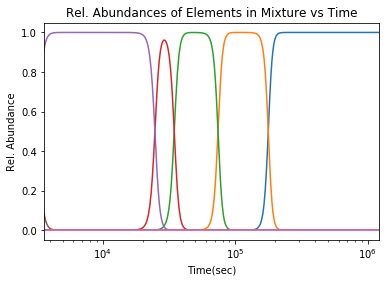

This is the graph for element  7 so there are  8  ionization states graphed


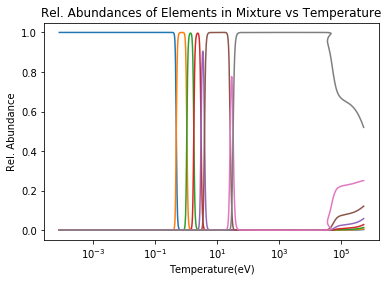

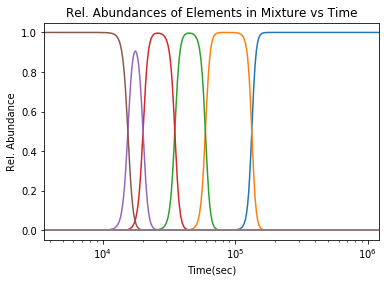

This is the graph for element  8 so there are  9  ionization states graphed


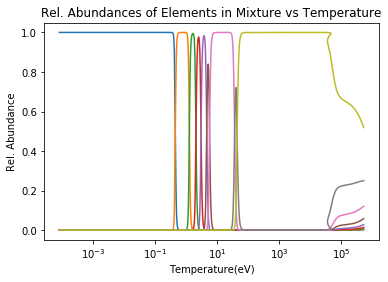

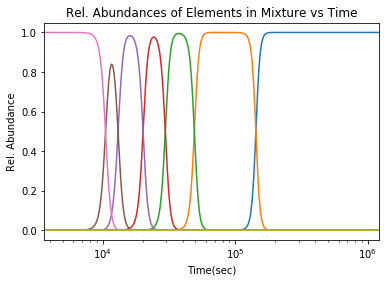

KeyboardInterrupt: 

In [34]:
element_num = 1
for Y in YI_all_adjusted:
    #Temperature
    Ytot = np.sum(Y,1)
    print('This is the graph for element ',element_num,'so there are ',element_num+1,' ionization states graphed')
    for i in range(len(Y[0])):
        plt.semilogx(kbEvpGK*np.array(full_temp),(Y[:,i])/Ytot)
        plt.xlabel("Temperature(eV)")
        plt.ylabel("Rel. Abundance")
        plt.title("Rel. Abundances of Elements in Mixture vs Temperature")
    plt.show()
    
    #Time
    for i in range(len(Y[0])):
        plt.semilogx(np.array(time),(Y[:,i])/Ytot)
        plt.xlabel("Time(sec)")
        plt.ylabel("Rel. Abundance")
        plt.title("Rel. Abundances of Elements in Mixture vs Time")
        plt.xlim([3600,1.21e+6])
    element_num+=1
    plt.show()

C:\Users\bluef\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\bluef\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


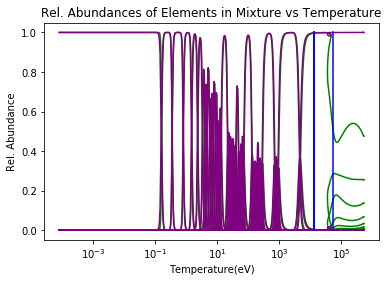

In [18]:
#Temperature
Y = YI_all_adjusted[61]
Ytot = np.sum(Y,1)
for i in range(len(Y[0])):
    plt.semilogx(kbEvpGK*np.array(full_temp),(Y[:,i])/Ytot,color = 'green')
    plt.xlabel("Temperature(eV)")
    plt.ylabel("Rel. Abundance")
    plt.title("Rel. Abundances of Elements in Mixture vs Temperature")

#Temperature
Y = YI_lanth_act[4]
Ytot = np.sum(Y,1)
for i in range(len(Y[0])):
    plt.semilogx(kbEvpGK*np.array(full_temp),(Y[:,i])/Ytot,color = 'purple')
    plt.xlabel("Temperature(eV)")
    plt.ylabel("Rel. Abundance")
    plt.title("Rel. Abundances of Elements in Mixture vs Temperature")

#Plotting the last 5 lines since that is where the discrepancy occurs. 
for xi in ion_potential_Sm[-5:-1]: 
    plt.semilogx([xi, xi], [0, 1],color = 'b')
    
   
   